## Computing the exchange rates versus the dollar

In [10]:
import os
os.chdir("/Users/hirecheariles/Documents/Cours/Master Finance/S1/International Finance/Project")

In [11]:
import pandas as pd

def spot(): #Importing spots
    spot1 = pd.read_excel("assignment_spot_rates_MAJ (2).xls", sheet_name="daily_spot_1", skiprows=1, index_col="Code")
    spot2 = pd.read_excel("assignment_spot_rates_MAJ (2).xls", skiprows=1, sheet_name="daily_spot_2", index_col="Code")
    return spot1.join(spot2).filter(regex="ER") #Only import columns where finding redular expression "ER"
spt=spot()
spt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6995 entries, 1998-01-01 to 2024-10-23
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AUSTDOL(ER)  6995 non-null   float64
 1   BRACRUZ(ER)  6995 non-null   float64
 2   BULGLEV(ER)  6995 non-null   float64
 3   CNDOLLR(ER)  6995 non-null   float64
 4   CHILPES(ER)  6995 non-null   float64
 5   CROATKN(ER)  6995 non-null   float64
 6   USEURSP(ER)  6995 non-null   float64
 7   HUNFORT(ER)  6995 non-null   float64
 8   INDRUPE(ER)  6995 non-null   float64
 9   INDORUP(ER)  6995 non-null   float64
 10  ISRSHEK(ER)  6995 non-null   float64
 11  JAPAYEN(ER)  6995 non-null   float64
 12  MEXPESO(ER)  6995 non-null   float64
 13  NZDOLLR(ER)  6995 non-null   float64
 14  NORKRON(ER)  6995 non-null   float64
 15  PHILPES(ER)  6995 non-null   float64
 16  POLZLOT(ER)  6995 non-null   float64
 17  CISRUBM(ER)  6995 non-null   float64
 18  SINGDOL(ER)  6995 non-null   f

The spot exchange rates are against GBP, we must convert them to $

To do so, as GBP is the base currency against all the others (except € which is already quoted in $ in the database), we divide by the GBP/USD rate that we have in the database, at each date ; and invert the quotes to get foreign currency as the base, evaluated in USD.

In [12]:
spt=spot() #importing spots

#Converting into dollars
spt_dol = 1 / (spt.drop(columns=["USDOLLR(ER)"]).mul(1/spt["USDOLLR(ER)"], axis=0))
                        #We do not convert GBP already evaluated in $
spt_dol["GBP(ER)"] = spt["USDOLLR(ER)"] #Including GBP/USD back in the dataframe
spt_dol["USEURSP(ER)"]=spt["USEURSP(ER)"] #We've tranformed € too which was already quoted in $, so we must revert it back to its initial value

#Computing daily log returns
import numpy as np
for i in spt_dol.columns:
    spt_dol[i + "_dr"] = np.log(spt_dol[i])-np.log(spt_dol[i].shift()) #loging the prices and computing the continuous returns

#Re ordering my columns to have the GBP/USD spot rate as last column
cols = [c for c in spt_dol.columns if c != "GBP(ER)"] + ["GBP(ER)"]
spt_dol = spt_dol[cols]

spt_dol.head()

,AUSTDOL(ER),BRACRUZ(ER),BULGLEV(ER),CNDOLLR(ER),CHILPES(ER),CROATKN(ER),USEURSP(ER),HUNFORT(ER),INDRUPE(ER),INDORUP(ER),...,POLZLOT(ER)_dr,CISRUBM(ER)_dr,SINGDOL(ER)_dr,COMRAND(ER)_dr,SWEKRON(ER)_dr,SWISSFR(ER)_dr,THABAHT(ER)_dr,CZECHCM(ER)_dr,GBP(ER)_dr,GBP(ER)
Code,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.651546,0.896014,0.560224,0.698781,0.002281,0.158178,1.09073,0.004897,0.025504,0.000182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64535
1998-01-02,0.649949,0.896068,0.560224,0.701424,0.002272,0.157782,1.08749,0.004885,0.025439,0.000167,...,-0.000707,-2.127433e-04,-0.006646,-0.003080,-0.004185,-0.005992,-0.000001,-0.007571,-0.002830,1.64070
1998-01-05,0.642941,0.895997,0.551572,0.702026,0.002269,0.156560,1.07897,0.004863,0.025377,0.000147,...,-0.000710,1.627538e-04,-0.015091,-0.006430,-0.004763,-0.006687,-0.035698,-0.016817,-0.001281,1.63860
1998-01-06,0.632667,0.895989,0.550205,0.698725,0.002250,0.156156,1.07584,0.004854,0.025345,0.000132,...,0.000139,5.731762e-07,-0.020697,-0.005978,-0.006225,0.000106,-0.045061,-0.013904,-0.003515,1.63285
1998-01-07,0.639802,0.895272,0.548848,0.697754,0.002227,0.155686,1.07415,0.004848,0.025262,0.000126,...,-0.001976,8.244182e-07,0.010589,0.002940,0.000217,-0.000630,-0.015210,0.006236,-0.005035,1.62465


## Brief explanatory data analysis

- Highlighting the most volatile currencies split in 5 portfolios:

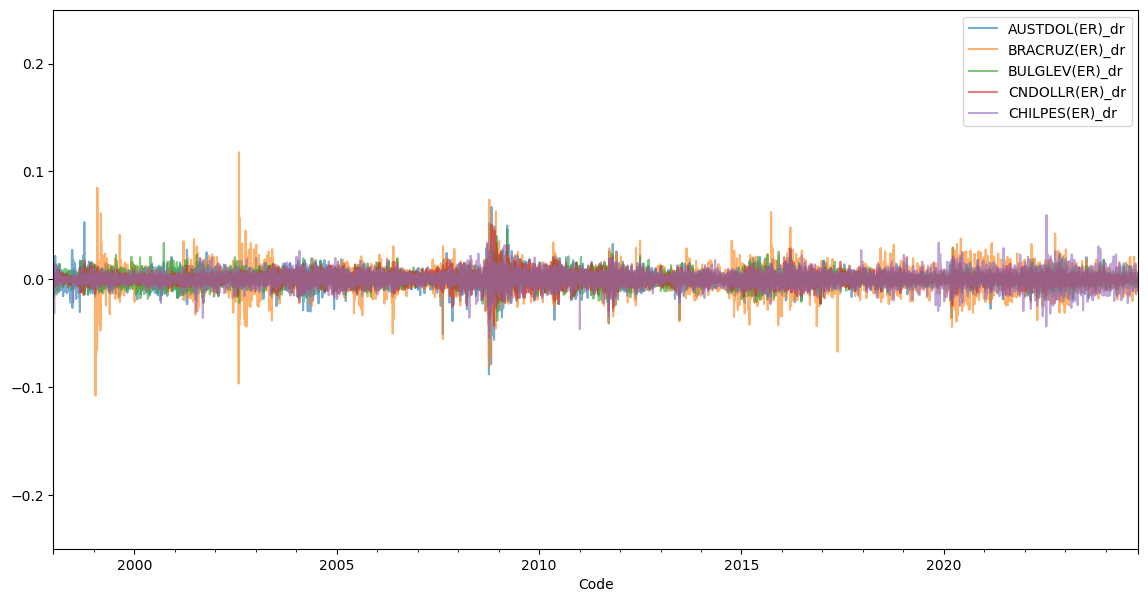

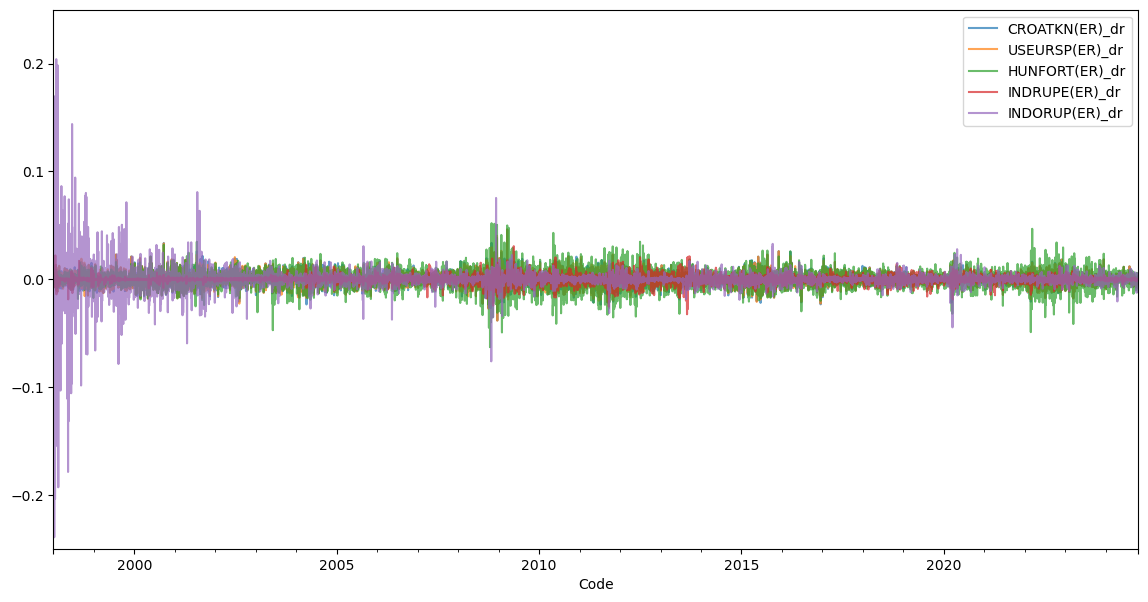

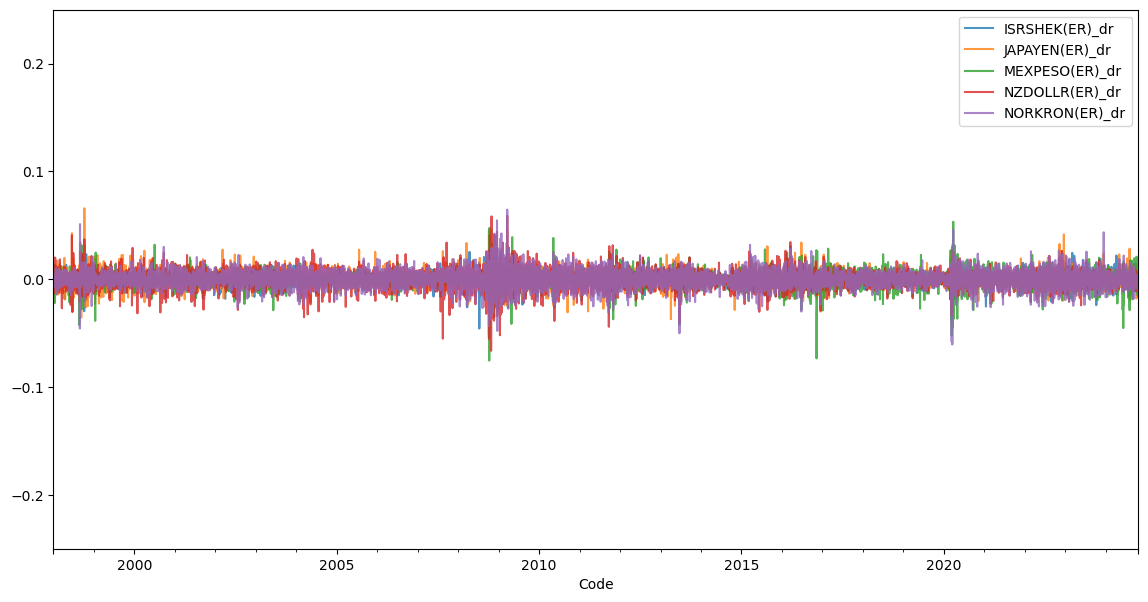

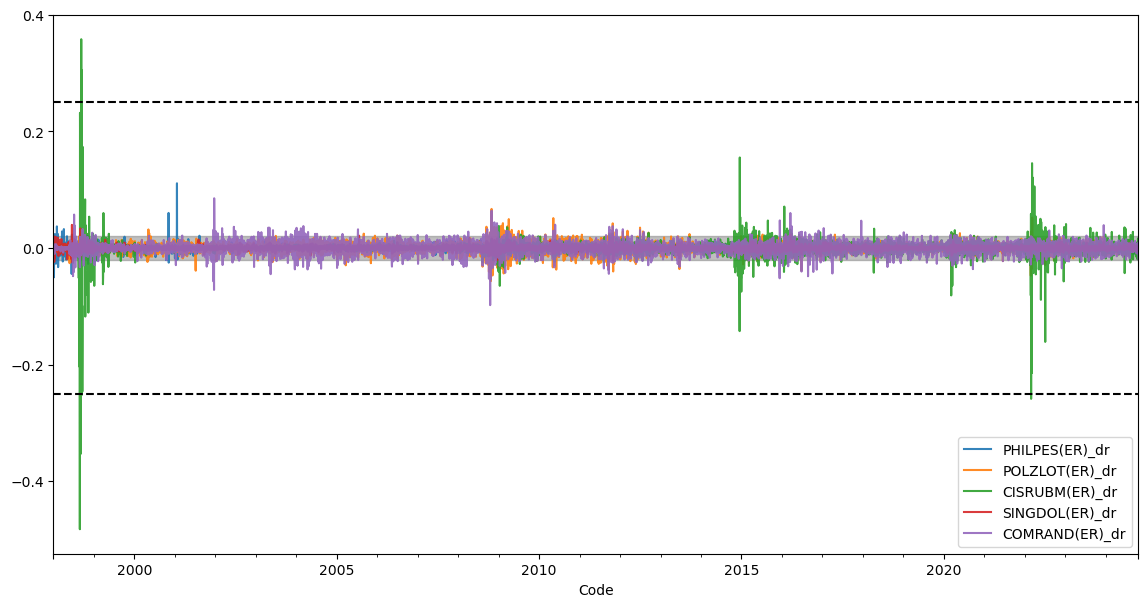

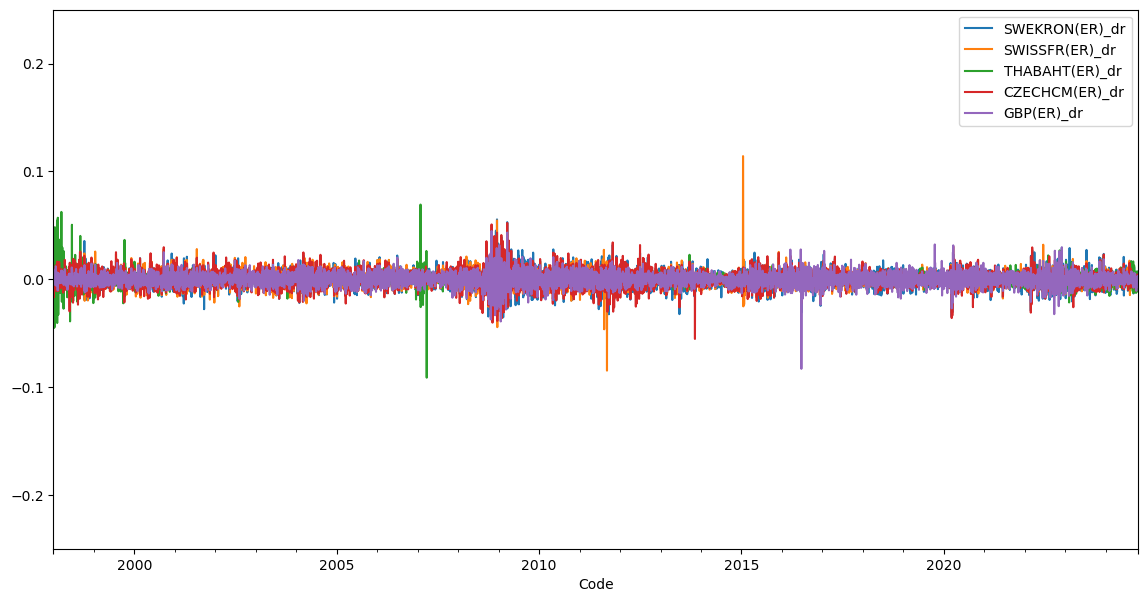

In [13]:
spt_dol.filter(regex='dr').iloc[:,:5].plot(figsize=(14,7), alpha=0.6, ylim=(-0.25, 0.25))
spt_dol.filter(regex='dr').iloc[:,5:10].plot(figsize=(14,7), alpha=0.7, ylim=(-0.25, 0.25))
spt_dol.filter(regex='dr').iloc[:,10:15].plot(figsize=(14,7), alpha=0.8, ylim=(-0.25, 0.25))
ax4 = spt_dol.filter(regex='dr').iloc[:,15:20].plot(figsize=(14,7), alpha=0.9)
spt_dol.filter(regex='dr').iloc[:,20:25].plot(figsize=(14,7), ylim=(-0.25, 0.25));

ax4.axhline(0.25, color='black', linestyle='--')
ax4.axhline(-0.25, color='black', linestyle='--')
ax4.fill_between(ax4.get_xlim(), -0.02, 0.02, color='gray', alpha=0.5);

- Plotting Sharpe ratios and observing the distribution per currencies:

In [14]:
resume = spt_dol.filter(regex='dr').describe().drop('count')
resume.loc["sharpe"]=resume.loc["mean"]/resume.loc["std"]
resume

,AUSTDOL(ER)_dr,BRACRUZ(ER)_dr,BULGLEV(ER)_dr,CNDOLLR(ER)_dr,CHILPES(ER)_dr,CROATKN(ER)_dr,USEURSP(ER)_dr,HUNFORT(ER)_dr,INDRUPE(ER)_dr,INDORUP(ER)_dr,...,PHILPES(ER)_dr,POLZLOT(ER)_dr,CISRUBM(ER)_dr,SINGDOL(ER)_dr,COMRAND(ER)_dr,SWEKRON(ER)_dr,SWISSFR(ER)_dr,THABAHT(ER)_dr,CZECHCM(ER)_dr,GBP(ER)_dr
mean,0.000003,-0.000234,-0.000002,0.000005,-1.101234e-04,-0.000014,-0.000002,-0.000087,-0.000109,-1.493730e-04,...,-0.000053,-0.000019,-0.000397,0.000035,-0.000186,-0.000042,0.000074,5.185907e-05,0.000056,-0.000034
std,0.007624,0.010190,0.005690,0.005293,6.905808e-03,0.005872,0.005713,0.008336,0.003504,1.183985e-02,...,0.004211,0.007853,0.016144,0.003513,0.010117,0.007123,0.006303,4.673798e-03,0.007078,0.005771
min,-0.088296,-0.108026,-0.038504,-0.043371,-5.462360e-02,-0.038280,-0.038441,-0.063048,-0.032514,-2.393656e-01,...,-0.050412,-0.056964,-0.482518,-0.024793,-0.098078,-0.035410,-0.084786,-9.133241e-02,-0.055399,-0.083120
25%,-0.003947,-0.004761,-0.003062,-0.002816,-3.722795e-03,-0.003251,-0.003105,-0.004277,-0.001185,-2.011892e-03,...,-0.001731,-0.003843,-0.002675,-0.001665,-0.005558,-0.004041,-0.003309,-1.676385e-03,-0.003733,-0.003178
50%,0.000146,-0.000020,-0.000008,0.000000,-1.254650e-07,0.000000,0.000000,0.000000,0.000000,-2.470405e-08,...,0.000000,0.000118,0.000000,0.000025,0.000000,-0.000007,-0.000060,1.310571e-07,0.000000,0.000000
75%,0.004128,0.004657,0.003068,0.002818,3.598862e-03,0.003153,0.003107,0.004387,0.001155,1.681097e-03,...,0.001760,0.004110,0.002483,0.001777,0.005590,0.003908,0.003235,1.714327e-03,0.003802,0.003140
max,0.066990,0.117795,0.046136,0.050483,5.954547e-02,0.046188,0.046172,0.051998,0.030639,2.041182e-01,...,0.110954,0.066974,0.358086,0.039568,0.085231,0.055474,0.114186,6.925191e-02,0.052194,0.044745
sharpe,0.000342,-0.022945,-0.000413,0.000891,-1.594649e-02,-0.002455,-0.000305,-0.010396,-0.031125,-1.261613e-02,...,-0.012631,-0.002460,-0.024594,0.009831,-0.018361,-0.005829,0.011799,1.109570e-02,0.007911,-0.005937


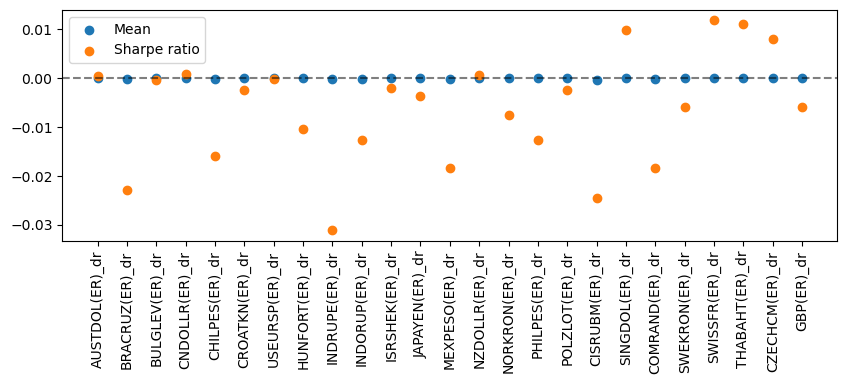

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.scatter(resume.columns, resume.loc["mean"], label="Mean")
plt.scatter(resume.columns, resume.loc["sharpe"], label="Sharpe ratio")
plt.xticks(rotation=90)
plt.axhline(0, color="black", linestyle="--", alpha=0.5)
plt.legend();

* Analysing the trends of rough and log exchange rates

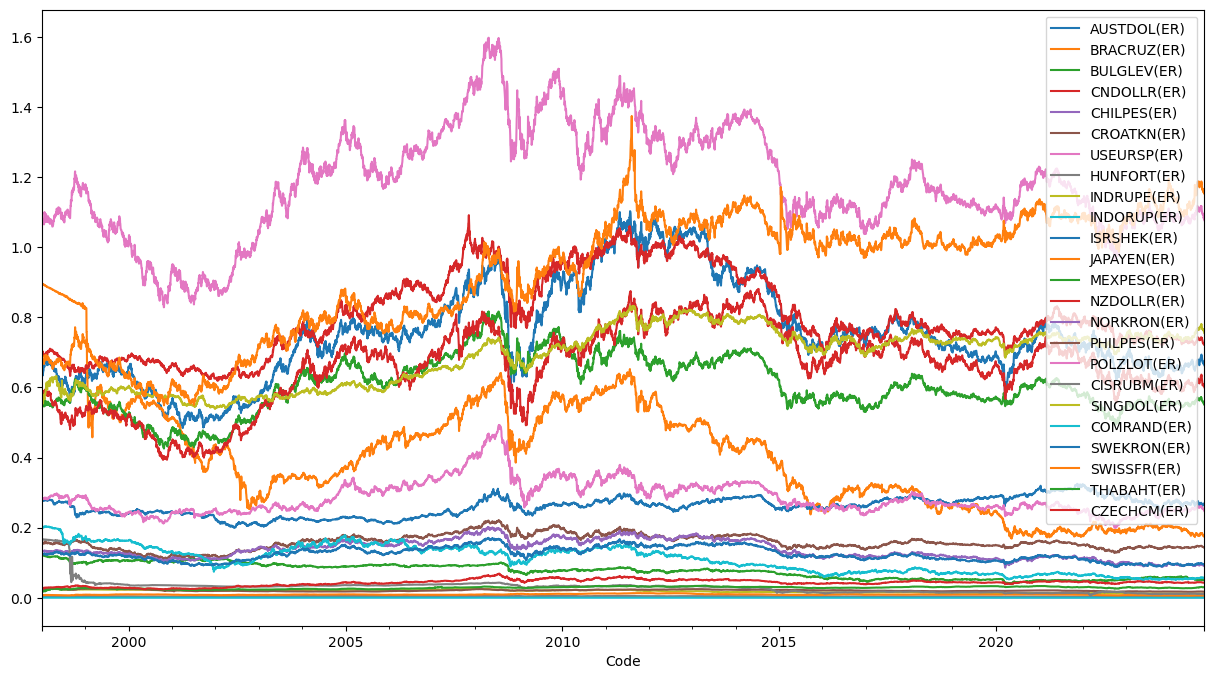

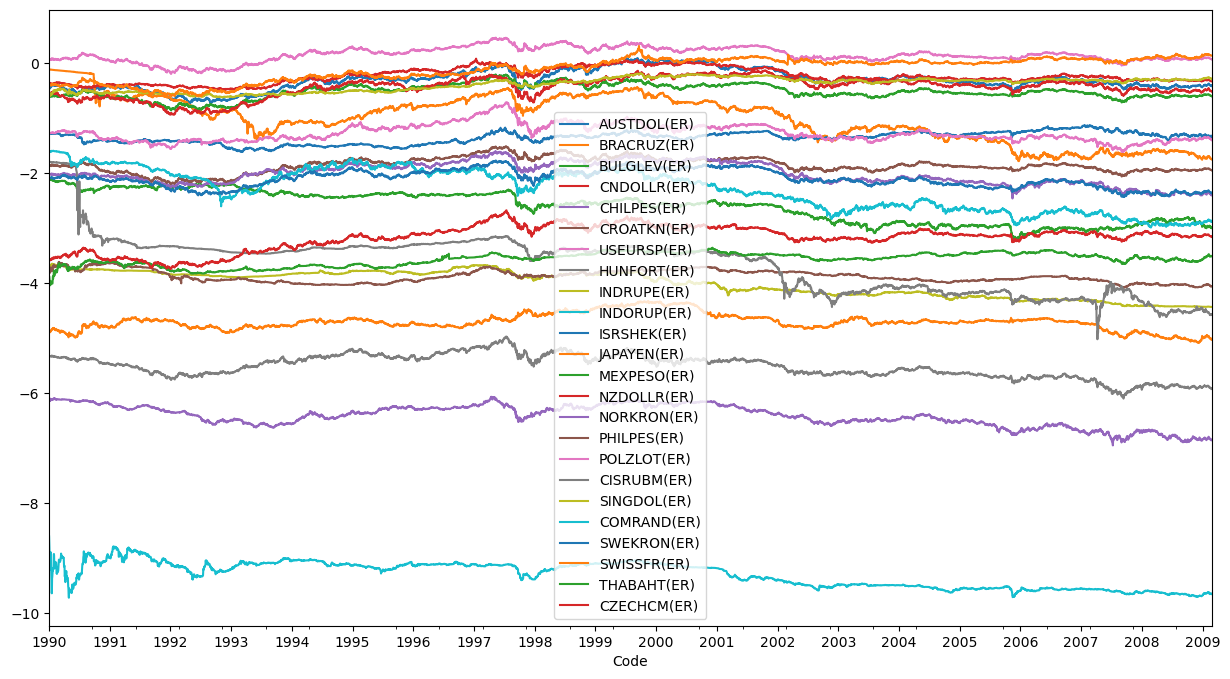

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15,8))
spt_dol.iloc[:,:24].plot(ax=ax1)
#ax1.xaxis.set_major_locator(mdates.YearLocator(1))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig, ax2 = plt.subplots(figsize=(15,8))
np.log(spt_dol.iloc[:, :24]).plot(ax=ax2)
ax2.xaxis.set_major_locator(mdates.YearLocator(1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

## Building daily log spot returns (feel free to skip this data wrangling part to get straight to the computation of the results)

### Assumig CIP holds:
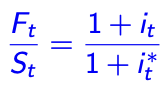

We compute our rate of return. For each period it is the sum of the ln(St+1/Ft) for the long currencies and ln(Ft/St+1) for the short ones, assumong CIP holds.

#### Creating a df with the 4-day lookback of all currencies without forward signal and defining rebalancing dates

In [17]:
lkbk = pd.DataFrame(index=spt_dol.index) #Using the same dates

for c in spt_dol.filter(regex="dr").columns: #We'll sum the last 4-days daily returns for each currency
    lkbk[c.replace("_dr", "")] = spt_dol[c].rolling("4D").sum() #total log-returns on the last 4 calandar days ≠ from 4 rows before if there are weekends, or public holidays
         #name of the look-back column

#Fixing all rebalancing dates, knowing that we only have the forwards from the 1st day of each month
ind = lkbk.index #storing the indices
rebal_dates= ind.to_series().groupby(ind.to_period("M")).min()
        #changing to a series  #Grouping by months      #taking the minimum of each group (first trading day of each month)
rebal_dates=pd.DatetimeIndex(rebal_dates)[1:] #Switching back to datetime and dropping the first date for which we can't do lookback

#### Importing forward prices

In [18]:
def forward(): #Merging the dataframes with the forward rates during the whole period
    frwd2=pd.read_excel("assignment_fwd_rates_MAJ (2).xlsx", sheet_name="fwd_2", skiprows=1, index_col="Code").filter(regex="ER")
    frwd3=pd.read_excel("assignment_fwd_rates_MAJ (2).xlsx", sheet_name="fwd3", skiprows=1, index_col="Code").filter(regex="ER")
    frwd = frwd2.join(frwd3)
   #frwd = pd.concat([frwd2, frwd3], axis=1)
    return frwd.iloc[1:, ~frwd.columns.str.contains("W")]  #only keeps the columns returning 'True' in the Boolean list, and dropping the first row corresponding to the 1998-01-01 
   #return frwd.drop(columns=[c for c in frwd.columns if "W" in c])  would've worked too
    
#Importing the forward rates in the merged sheet, which has less data (in an 'object' type). We won't use it later
fdst=pd.read_excel("assignment_fwd_rates_MAJ (2).xlsx", sheet_name="fwd1", skiprows=1, index_col="Code").filter(regex="ER")
fdst=fdst.drop(fdst.index[0]).iloc[:, ~fdst.columns.str.contains("W")]

#Returning the function with the complete forward rates
fd=forward()
fd.info()
lkbk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321 entries, 1998-02-01 to 2024-10-01
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TDAUD1M(ER)  321 non-null    float64
 1   BRL$1MF(ER)  291 non-null    float64
 2   BLEUR1F(ER)  247 non-null    float64
 3   BBCAD1F(ER)  321 non-null    float64
 4   CLEUR1F(ER)  247 non-null    float64
 5   USHRK1F(ER)  247 non-null    float64
 6   TDCZK1M(ER)  321 non-null    float64
 7   TDEUR1M(ER)  321 non-null    float64
 8   USHUF1F(ER)  321 non-null    float64
 9   USINR1F(ER)  321 non-null    float64
 10  USIDR1F(ER)  321 non-null    float64
 11  USILS1F(ER)  247 non-null    float64
 12  TDJPY1M(ER)  321 non-null    float64
 13  USMXN1F(ER)  321 non-null    float64
 14  TDNZD1M(ER)  321 non-null    float64
 15  TDNOK1M(ER)  321 non-null    float64
 16  USPHP1F(ER)  321 non-null    float64
 17  TDPLN1M(ER)  321 non-null    float64
 18  USRUB1F(ER)  247 non-null    fl

/Users/hirecheariles/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Unfortunately, the CZECH KORUNA is at the 7th position of the forward table, while it is (after wrangling the data, i.e. putting GBP at the last position) at the 24th position (instead of 25th) in our spot dataframe.

In [19]:
def forward(): #Refining our function
    frwd2=pd.read_excel("assignment_fwd_rates_MAJ (2).xlsx", sheet_name="fwd_2", skiprows=1, index_col="Code").filter(regex="ER")
    frwd3=pd.read_excel("assignment_fwd_rates_MAJ (2).xlsx", sheet_name="fwd3", skiprows=1, index_col="Code").filter(regex="ER")
    frwd = frwd2.join(frwd3)
   #frwd = pd.concat([frwd2, frwd3], axis=1)
    frwd = frwd.iloc[1:, ~frwd.columns.str.contains("W")] #Removing weekly forwards
    #Moving data
    cols = frwd.columns.tolist()
    cols.insert(23, cols.pop(6))  # changing index 5 to index 22 (6th column to 23rd position)
    frwd = frwd[cols]
    
    return frwd

fd=forward() #calling the previous function
fd.info()
lkbk.info()
fd

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321 entries, 1998-02-01 to 2024-10-01
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TDAUD1M(ER)  321 non-null    float64
 1   BRL$1MF(ER)  291 non-null    float64
 2   BLEUR1F(ER)  247 non-null    float64
 3   BBCAD1F(ER)  321 non-null    float64
 4   CLEUR1F(ER)  247 non-null    float64
 5   USHRK1F(ER)  247 non-null    float64
 6   TDEUR1M(ER)  321 non-null    float64
 7   USHUF1F(ER)  321 non-null    float64
 8   USINR1F(ER)  321 non-null    float64
 9   USIDR1F(ER)  321 non-null    float64
 10  USILS1F(ER)  247 non-null    float64
 11  TDJPY1M(ER)  321 non-null    float64
 12  USMXN1F(ER)  321 non-null    float64
 13  TDNZD1M(ER)  321 non-null    float64
 14  TDNOK1M(ER)  321 non-null    float64
 15  USPHP1F(ER)  321 non-null    float64
 16  TDPLN1M(ER)  321 non-null    float64
 17  USRUB1F(ER)  247 non-null    float64
 18  BBSGD1F(ER)  321 non-null    fl

,TDAUD1M(ER),BRL$1MF(ER),BLEUR1F(ER),BBCAD1F(ER),CLEUR1F(ER),USHRK1F(ER),TDEUR1M(ER),USHUF1F(ER),USINR1F(ER),USIDR1F(ER),...,USPHP1F(ER),TDPLN1M(ER),USRUB1F(ER),BBSGD1F(ER),TDZAR1M(ER),TDSEK1M(ER),TDCHF1M(ER),USTHB1F(ER),TDCZK1M(ER),TDGBP1M(ER)
Code,,,,,,,,,,,,,,,,,,,,,
1998-02-01,0.68607,NaN,NaN,1.4516,NaN,NaN,1.09155,210.0550,38.9255,10275.0,...,41.5860,3.59035,NaN,1.7160,4.96625,8.06140,1.46795,51.2750,35.14749,1.63705
1998-03-01,0.68348,NaN,NaN,1.4247,NaN,NaN,1.09157,211.0750,39.5420,8835.0,...,40.0430,3.54035,NaN,1.6184,4.96600,7.97715,1.46027,43.8800,34.11249,1.64514
1998-04-01,0.65799,NaN,NaN,1.4164,NaN,NaN,1.07499,215.8800,39.5110,8725.0,...,38.7155,3.51156,NaN,1.6231,5.08300,8.03090,1.52837,40.0500,34.50850,1.66875
1998-05-01,0.64888,NaN,NaN,1.4329,NaN,NaN,1.10997,211.8750,39.7325,8320.0,...,40.6335,3.44785,NaN,1.5849,5.08700,7.69270,1.48666,39.1500,33.00800,1.66404
1998-06-01,0.61553,NaN,NaN,1.4552,NaN,NaN,1.10917,216.2200,41.7500,11950.0,...,39.6830,3.56905,NaN,1.6781,5.27550,7.80365,1.47142,43.0500,33.57199,1.63740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,0.66935,5.26410,1.95381,1.3634,990.43238,6.92225,1.09166,360.3112,83.2188,16237.0,...,58.7280,3.92445,90.4527,1.3452,18.55923,10.39624,0.89294,36.7005,22.62175,1.28080
2024-07-01,0.66632,5.68060,1.95351,1.3727,1011.04840,7.01148,1.07537,368.2215,83.5263,16330.0,...,58.6450,4.02077,87.8385,1.3557,18.41624,10.60091,0.89938,36.6145,23.39185,1.26514
2024-08-01,0.65057,5.76760,1.95586,1.3843,1012.62270,6.97115,1.08080,367.3927,83.8088,16251.0,...,58.3700,3.98551,86.3591,1.3350,18.32208,10.71435,0.86993,35.5175,23.43890,1.27449


### Now we face two issues :

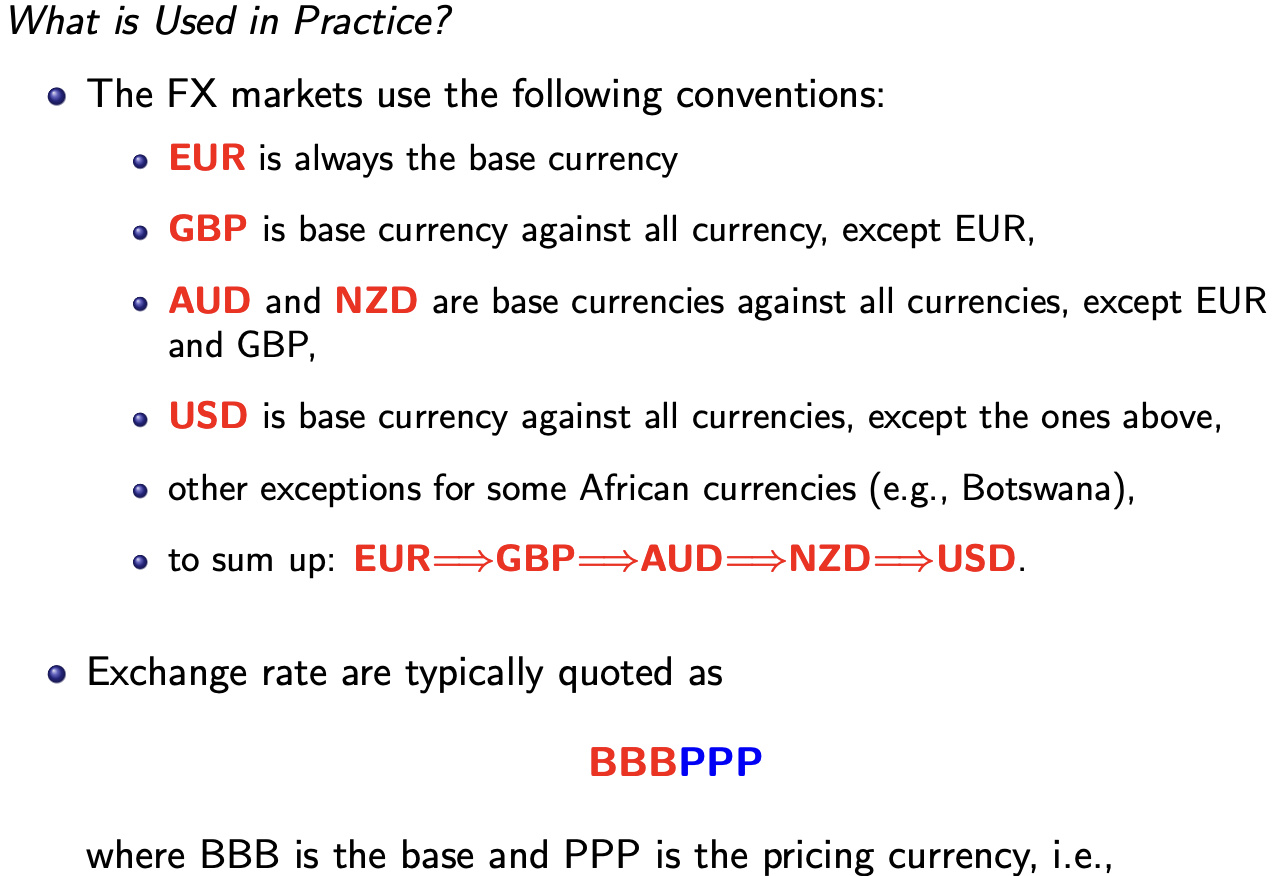
#### 1.
then EUR, GBP, AUD and NZD are quoted as basis, but not the other currencies so we need to invert all the other ones (as we did for spot rates above) to compare their values in $.

#### 2.
BGN (BULGARIAN LEV) and CLP (CHILEAN PESO) are quoted against €. Once again, same issue than at the beginning, we must divide their forward by the spot EUR/USD and then invert them.

In [20]:
def forward(): #Refining our function
    frwd2=pd.read_excel("assignment_fwd_rates_MAJ (2).xlsx", sheet_name="fwd_2", skiprows=1, index_col="Code").filter(regex="ER")
    frwd3=pd.read_excel("assignment_fwd_rates_MAJ (2).xlsx", sheet_name="fwd3", skiprows=1, index_col="Code").filter(regex="ER")
    frwd = frwd2.join(frwd3)
   #frwd = pd.concat([frwd2, frwd3], axis=1)
    frwd = frwd.iloc[1:, ~frwd.columns.str.contains("W")] #Removing weekly forwards

    #Moving data
    cols = frwd.columns.tolist()
    cols.insert(23, cols.pop(6))  # changing index 5 to index 22 (6th column to 23rd position)
    frwd = frwd[cols]

    #Inverting non-EUR, GBP, AUD and NZD currencies
    others = ["TDAUD1M(ER)", "BLEUR1F(ER)", "CLEUR1F(ER)", "TDEUR1M(ER)", "TDNZD1M(ER)", "TDGBP1M(ER)"]
    mask = ~frwd.columns.isin(others) 
    frwd.loc[:, mask] = 1 / frwd.loc[:, mask] #Inverting all the columns except "others"
    
    #Converting BGN and CLP quotes into USD ones
    eurusd = pd.Series(spt_dol.loc[rebal_dates, "USEURSP(ER)"].values, index=frwd.index) #By default, pandas divides by labels, not by position, so we follow the next steps
    #storing in a series the spot EUR/USD on each rebalancing dates, with the fd indices to match in the division below.
    frwd["BLEUR1F(ER)"] = 1 / (frwd["BLEUR1F(ER)"] / eurusd)
    frwd["CLEUR1F(ER)"] = 1 / (frwd["CLEUR1F(ER)"] / eurusd)  #Dividing by spot EUR/USD rebalancing dates (we don't have spots on the exact 1st day of each month)

    frwd.columns = lkbk.columns #Matching the columns names on the spot dataframe ones
    return frwd

fd=forward()
fd

,AUSTDOL(ER),BRACRUZ(ER),BULGLEV(ER),CNDOLLR(ER),CHILPES(ER),CROATKN(ER),USEURSP(ER),HUNFORT(ER),INDRUPE(ER),INDORUP(ER),...,PHILPES(ER),POLZLOT(ER),CISRUBM(ER),SINGDOL(ER),COMRAND(ER),SWEKRON(ER),SWISSFR(ER),THABAHT(ER),CZECHCM(ER),GBP(ER)
Code,,,,,,,,,,,,,,,,,,,,,
1998-02-01,0.68607,NaN,NaN,0.688895,NaN,NaN,1.09155,0.004761,0.025690,0.000097,...,0.024047,0.278524,NaN,0.582751,0.201359,0.124048,0.681222,0.019503,0.028452,1.63705
1998-03-01,0.68348,NaN,NaN,0.701902,NaN,NaN,1.09157,0.004738,0.025290,0.000113,...,0.024973,0.282458,NaN,0.617894,0.201369,0.125358,0.684805,0.022789,0.029315,1.64514
1998-04-01,0.65799,NaN,NaN,0.706015,NaN,NaN,1.07499,0.004632,0.025309,0.000115,...,0.025829,0.284774,NaN,0.616105,0.196734,0.124519,0.654292,0.024969,0.028978,1.66875
1998-05-01,0.64888,NaN,NaN,0.697885,NaN,NaN,1.10997,0.004720,0.025168,0.000120,...,0.024610,0.290036,NaN,0.630955,0.196580,0.129993,0.672649,0.025543,0.030296,1.66404
1998-06-01,0.61553,NaN,NaN,0.687191,NaN,NaN,1.10917,0.004625,0.023952,0.000084,...,0.025200,0.280187,NaN,0.595912,0.189555,0.128145,0.679616,0.023229,0.029787,1.63740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,0.66935,0.189966,0.556349,0.733460,0.001098,0.144462,1.09166,0.002775,0.012017,0.000062,...,0.017028,0.254813,0.011056,0.743384,0.053882,0.096189,1.119896,0.027248,0.044205,1.28080
2024-07-01,0.66632,0.176038,0.549242,0.728491,0.001061,0.142623,1.07537,0.002716,0.011972,0.000061,...,0.017052,0.248709,0.011385,0.737626,0.054300,0.094332,1.111877,0.027312,0.042750,1.26514
2024-08-01,0.65057,0.173382,0.551803,0.722387,0.001066,0.143448,1.08080,0.002722,0.011932,0.000062,...,0.017132,0.250909,0.011580,0.749064,0.054579,0.093333,1.149518,0.028155,0.042664,1.27449


We'll note that the rebalancing dates aren't always the 1st of the month contrary to forward ones. We'll consider low fluctuations of forward prices within 2 days, so that pnl is computed with respect to it even when we use the spot on the 2nd or the 3rd of the month as a rebalancing date.

Moreover, we don't have data prior to 1998-01-01, so we'll start our strategy on 1998-02-02.

Another issue is that we don't have every forward rates for some currencies currencies

In [21]:
print(fd.columns[fd.isna().any()])

Index(['BRACRUZ(ER)', 'BULGLEV(ER)', 'CHILPES(ER)', 'CROATKN(ER)',
       'ISRSHEK(ER)', 'CISRUBM(ER)'],
      dtype='object')


In [22]:
fdna = fd[fd.columns[fd.isna().any()]] #New dataframe, only with columns including nan
print(fdna.isna().sum()) #How many nan per column

fdna.head(75)

BRACRUZ(ER)    30
BULGLEV(ER)    74
CHILPES(ER)    74
CROATKN(ER)    74
ISRSHEK(ER)    74
CISRUBM(ER)    74
dtype: int64


,BRACRUZ(ER),BULGLEV(ER),CHILPES(ER),CROATKN(ER),ISRSHEK(ER),CISRUBM(ER)
Code,,,,,,
1998-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1998-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1998-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2003-12-01,0.335570,NaN,NaN,NaN,NaN,NaN
2004-01-01,0.343466,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.337496,NaN,NaN,NaN,NaN,NaN


Fortunately, the nan are at the beginning of each column. We rebalance the portfolio such that the currencies aren't included on these dates.

## Allocating the currencies in portfolios according to the four-day looking back, one-month-holding-period momentum strategy and dealing with Nan forwards

We have na values for the forward on the following dates : 
- Before 01/08/2000 (index 30) for BRACRUZ(ER)
- Before 01/04/2004 (index 74) for BULGLEV(ER) CHILPES(ER) CROATKN(ER) ISRSHEK(ER) CISRUBM(ER).

Consequently, we adjust our portfolio by dropping these currencies when forward data is unavailable

You should create 5 portfolios containing 5 currencies each and rebalance them on a
monthly basis.

In [23]:
#Building the differents portfolios
pfo1={'AUSTDOL(ER)': [], 'BRACRUZ(ER)': [], 'BULGLEV(ER)': [], 'CNDOLLR(ER)': [], 'CHILPES(ER)': []}
pfo2={'CROATKN(ER)': [],'USEURSP(ER)': [], 'HUNFORT(ER)': [], 'INDRUPE(ER)': [], 'INDORUP(ER)': []}
pfo3={'ISRSHEK(ER)': [],'JAPAYEN(ER)': [], 'MEXPESO(ER)': [], 'NZDOLLR(ER)': [], 'NORKRON(ER)': []}
pfo4={'PHILPES(ER)': [],'POLZLOT(ER)': [], 'CISRUBM(ER)': [], 'SINGDOL(ER)': [], 'COMRAND(ER)': []}
pfo5={'SWEKRON(ER)': [],'SWISSFR(ER)': [], 'THABAHT(ER)': [], "CZECHCM(ER)": [], 'GBP(ER)': []}

for d in rebal_dates:
    for p in (pfo1, pfo2, pfo3, pfo4, pfo5): #We rebalance each portfolio on each rebalancing date
        lkbk_set = lkbk.loc[d]
        if d < pd.Timestamp("2000-08-01"): lkbk_set = lkbk_set.drop("BRACRUZ(ER)", axis=0)  #Dropping currencies prior to dates where forwards data are available
        if d < pd.Timestamp("2004-04-01"): lkbk_set = lkbk_set.drop(["BULGLEV(ER)", "CHILPES(ER)", "CROATKN(ER)", "ISRSHEK(ER)", "CISRUBM(ER)"])
        for currency in p :
            if currency not in lkbk_set.index :  p[currency].append('Nan') 
            elif lkbk_set[currency]>0 : p[currency].append('Long') 
            else : p[currency].append("Short")


pfo1 = pd.DataFrame(pfo1, index=rebal_dates)
pfo2 = pd.DataFrame(pfo2, index=rebal_dates)
pfo3 = pd.DataFrame(pfo3, index=rebal_dates)
pfo4 = pd.DataFrame(pfo4, index=rebal_dates)
pfo5 = pd.DataFrame(pfo5, index=rebal_dates)

And we build a portfolio where we go long the 3 currencies with the highest momentum and short the 3 ones with the worst momentum:

In [26]:
#Creating a df with the 4-day lookback of all currencies

lkbk = pd.DataFrame(index=spt_dol.index) #Using the same dates

for c in spt_dol.filter(regex="dr").columns: #We'll sum the last 4-days daily returns for each currency
    lkbk[c.replace("_dr", "")] = spt_dol[c].rolling("4D").sum() #total log-returns on the last 4 calandar days ≠ from 4 rows before if there are weekends, or public holidays
         #name of the look-back column

#Building the differents portfolios
pfo_top3={"Long": [],"Short": []}

#Fixing all rebalancing dates, knowing that we only have the forwards from the 1st day of each month
ind = lkbk.index #storing the indices
rebal_dates= ind.to_series().groupby(ind.to_period("M")).min()
        #changing to a series  #Grouping by months      #taking the minimum of each group (first trading day of each month)
rebal_dates=pd.DatetimeIndex(rebal_dates)[1:] #Switching back to datetime and dropping the first date for which we can't do lookback

for i in rebal_dates:   #We build a new pfo at each rebalancing date
    lkbk_set = lkbk.loc[i].sort_values(ascending=True) #Ranking currency by 4-day momentums at each 'i' rebalancing date

    if i < pd.Timestamp("2000-08-01"): lkbk_set = lkbk_set.drop("BRACRUZ(ER)", axis=0)  #Dropping currencies prior to dates where forwards data are available
    if i < pd.Timestamp("2004-04-01"): lkbk_set = lkbk_set.drop(["BULGLEV(ER)", "CHILPES(ER)", "CROATKN(ER)", "ISRSHEK(ER)", "CISRUBM(ER)"])
    
    pfo_top3["Long"].append(list(lkbk_set.tail(3).index)) #List of the 3 highest loo-backs at date 'i'
    pfo_top3["Short"].append(list(lkbk_set.head(3).index)) #Lowest ones

pfo_top3 = pd.DataFrame(pfo_top3)
pfo_top3.index = rebal_dates #Fixing the indices as each rebalancing date
pfo_top3

,Long,Short
Code,,
1998-02-02,"[PHILPES(ER), THABAHT(ER), INDORUP(ER)]","[JAPAYEN(ER), SWISSFR(ER), INDRUPE(ER)]"
1998-03-02,"[NZDOLLR(ER), JAPAYEN(ER), INDORUP(ER)]","[THABAHT(ER), INDRUPE(ER), CNDOLLR(ER)]"
1998-04-01,"[CNDOLLR(ER), INDRUPE(ER), MEXPESO(ER)]","[THABAHT(ER), PHILPES(ER), JAPAYEN(ER)]"
1998-05-01,"[THABAHT(ER), CZECHCM(ER), SINGDOL(ER)]","[PHILPES(ER), JAPAYEN(ER), POLZLOT(ER)]"
1998-06-01,"[NORKRON(ER), HUNFORT(ER), GBP(ER)]","[THABAHT(ER), INDORUP(ER), MEXPESO(ER)]"
...,...,...
2024-06-03,"[ISRSHEK(ER), CHILPES(ER), SWEKRON(ER)]","[MEXPESO(ER), BRACRUZ(ER), HUNFORT(ER)]"
2024-07-01,"[HUNFORT(ER), CHILPES(ER), COMRAND(ER)]","[CISRUBM(ER), BRACRUZ(ER), SWISSFR(ER)]"
2024-08-01,"[THABAHT(ER), CHILPES(ER), JAPAYEN(ER)]","[ISRSHEK(ER), HUNFORT(ER), POLZLOT(ER)]"


## Let's compute the return of our strategy

For each month, we do the sum of:
* ln(St+1)-ln(Ft)  for the 5 long currencies  (including borrowing cost)
* ln(Ft)-ln(St+1)  for the 5 short currencies  (including investment proceed)

In [37]:
#Checking the currecnies in each portfolio
for p in (pfo1, pfo2, pfo3, pfo4, pfo5):
    print(p.columns)

Index(['AUSTDOL(ER)', 'BRACRUZ(ER)', 'BULGLEV(ER)', 'CNDOLLR(ER)',
       'CHILPES(ER)'],
      dtype='object')
Index(['CROATKN(ER)', 'USEURSP(ER)', 'HUNFORT(ER)', 'INDRUPE(ER)',
       'INDORUP(ER)'],
      dtype='object')
Index(['ISRSHEK(ER)', 'JAPAYEN(ER)', 'MEXPESO(ER)', 'NZDOLLR(ER)',
       'NORKRON(ER)'],
      dtype='object')
Index(['PHILPES(ER)', 'POLZLOT(ER)', 'CISRUBM(ER)', 'SINGDOL(ER)',
       'COMRAND(ER)'],
      dtype='object')
Index(['SWEKRON(ER)', 'SWISSFR(ER)', 'THABAHT(ER)', 'CZECHCM(ER)', 'GBP(ER)'], dtype='object')


Let's create a dictionary storing the returns for each of the 5 portfolio on each month

,pfo1,pfo2,pfo3,pfo4,pfo5
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,0.005858,0.013860,0.001291,0.011088,0.002857
std,0.096777,0.109360,0.082940,0.090310,0.095628
min,-0.384670,-0.407183,-0.372122,-0.418595,-0.282693
25%,-0.043893,-0.045856,-0.045429,-0.032424,-0.048633
50%,0.007751,0.011307,0.003988,0.012860,0.000680
75%,0.045542,0.069676,0.045903,0.054589,0.050639
max,0.655521,0.534243,0.531097,0.419483,0.366593
sharpe,0.060534,0.126741,0.015563,0.122778,0.029872


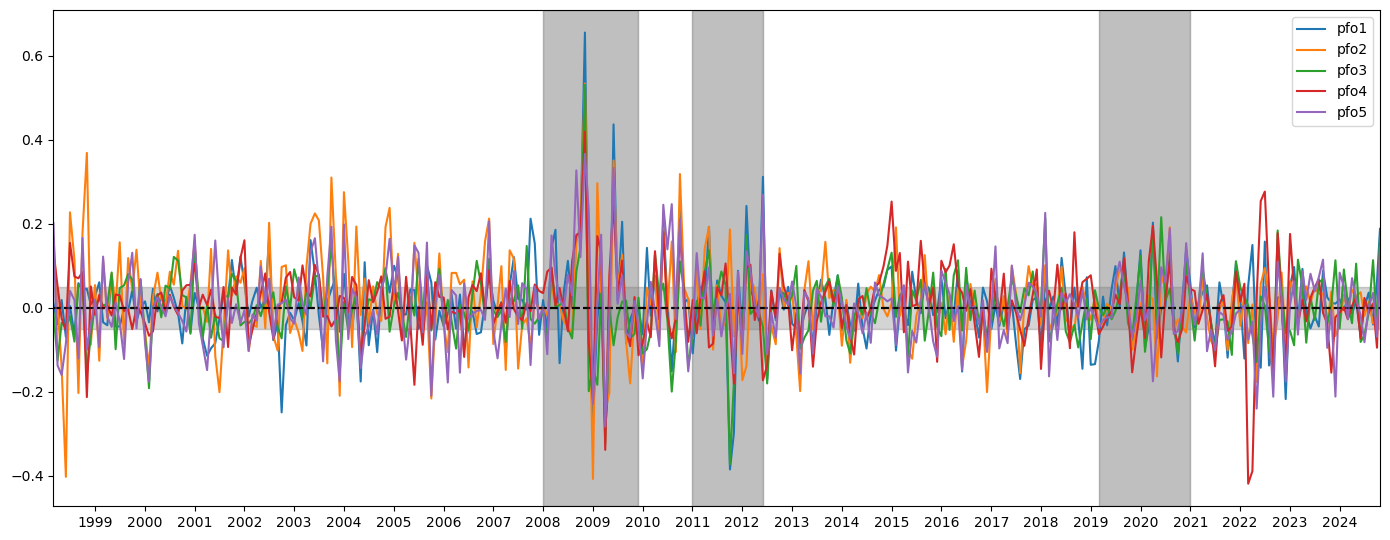

In [68]:
#Building a dataframe of the returns
from numpy import log

rebal_plus_last = rebal_dates.append(pd.DatetimeIndex(["2024-10-23"])) #Adding the last date to close the position taken on the last rebalancing date

gross_r={"pfo1":[], "pfo2":[], "pfo3":[], "pfo4":[], "pfo5":[]}
for t, i in enumerate(rebal_dates) : #Loop on the rebalacing dates
    for p, names in zip((pfo1, pfo2, pfo3, pfo4, pfo5), ("pfo1", "pfo2", "pfo3", "pfo4", "pfo5")): #For each portfolio
        ret=0
        for currency in p : #For each currency of the portfolio
            if p[currency].iloc[t] == "Nan": continue
            elif p[currency].iloc[t] == "Long": 
                ret+= log( spt_dol.loc[rebal_plus_last, currency].iloc[t+1] / fd[currency].iloc[t] )
            else:
                ret+= log( fd[currency].iloc[t] / spt_dol.loc[rebal_plus_last, currency].iloc[t+1] )
                                                    #Filtering spot on the rebalancing dates + the last available date to close the final positions.
        gross_r[names].append(ret)
        
gross_rdf = pd.DataFrame(gross_r, index=rebal_plus_last[1:]) #We don't have pnl when taking the first positions so we can drop the first date

#Plotting the evolution of the portfolios

import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(14, 5.5))

for name in ("pfo1", "pfo2", "pfo3", "pfo4", "pfo5"):
    ax.plot(gross_rdf.index, gross_rdf[name], label=name)
    
    ax.axhline(0, alpha=0.5, linestyle="--", color="black"); #x-axis
    ax.fill_between(ax.get_xlim(), -0.05, 0.05, alpha =0.075, color='grey') #controlled volatility range
    
    ax.axvspan(pd.Timestamp("2008-01-01"), pd.Timestamp("2009-12-01"), color='grey', alpha=0.125) #Grey shaded area on crisis periods
    ax.axvspan(pd.Timestamp("2011-01-01"), pd.Timestamp("2012-06-01"), color='grey', alpha=0.125)
    ax.axvspan(pd.Timestamp("2019-03-01"), pd.Timestamp("2021-01-01"), color='grey', alpha=0.125)
    
    ax.set_xlim(gross_rdf.index.min(), gross_rdf.index.max()) #Setting plot dimensions
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    
ax.legend()  #Display legend
plt.tight_layout()  #Matching the displayed window to the data (no white space)

resume = gross_rdf.describe()
resume.loc["sharpe"]=resume.loc["mean"]/resume.loc["std"]
resume

We do the same for the "Long top3, Short bottom3" portfolio

,top3bot3
count,321.000000
mean,0.004188
std,0.094980
min,-0.413710
25%,-0.051748
50%,0.000840
75%,0.050846
max,0.382156
sharpe,0.044092


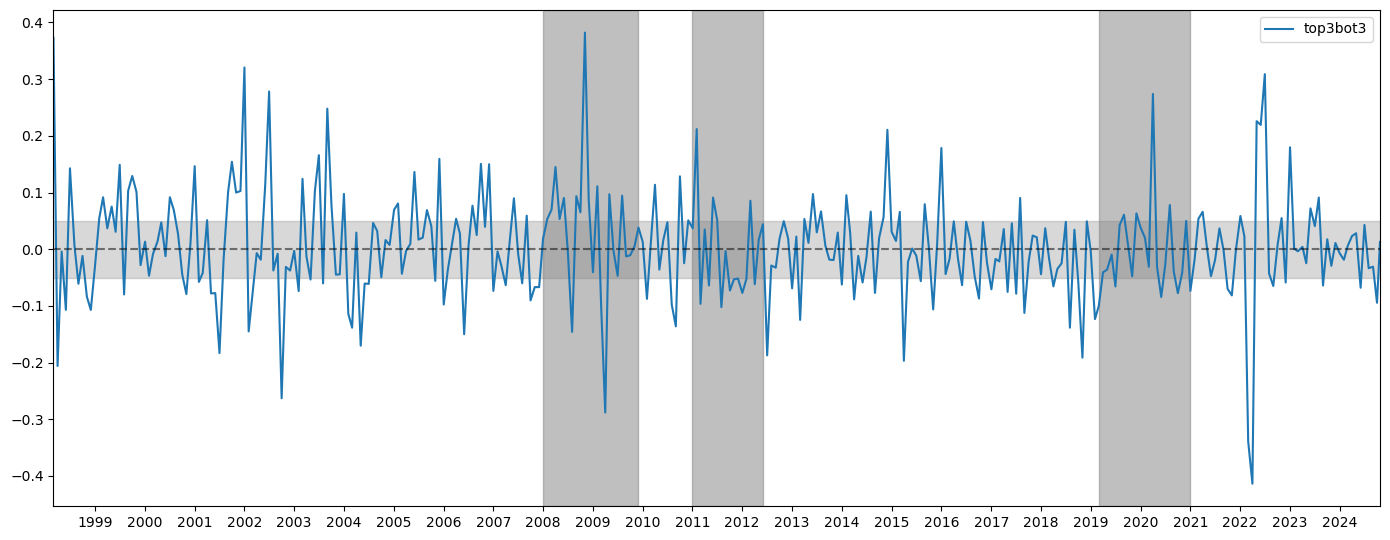

In [75]:
#Building a dataframe of the returns

grossr_top3={"top3bot3":[]}
for c, i in enumerate(pfo_top3.index) : #Loop on the pfo's rebalacing dates and closing 
    ret=0
    for (l, s) in zip(pfo_top3.loc[i,"Long"], pfo_top3.loc[i,"Short"]): #Iterating on the list of long/short currencies on date i
#       l_col = pfo.columns.get_loc(l) #Finding the index of the column as the names aren't the same in pfo and forward dataframes
#       s_col = pfo.columns.get_loc(s)
        ret += log( spt_dol.loc[rebal_plus_last, l].iloc[c+1] / fd[l].iloc[c] ) + log( fd[s].iloc[c] / spt_dol.loc[rebal_plus_last, s].iloc[c+1] )
                  #Filtering spot on the rebalancing dates + the last available date to close the final positions.
        #print(spt_dol[l, pfo.index].iloc[c+1])
    grossr_top3["top3bot3"].append(ret)

grossr_top3 = pd.DataFrame(grossr_top3, index=rebal_plus_last[1:]) # or fd.index?

#Plotting the evolution

fig, ax = plt.subplots(figsize=(14, 5.5))
ax.plot(grossr_top3.index, grossr_top3["top3bot3"], label="top3bot3")

ax.axhline(0, alpha=0.5, linestyle="--", color="black"); #x-axis
ax.fill_between(ax.get_xlim(), -0.05, 0.05, alpha =0.3, color='grey') #controlled volatility range

ax.axvspan(pd.Timestamp("2008-01-01"), pd.Timestamp("2009-12-01"), color='grey', alpha=0.5) #Grey shaded area on crisis periods
ax.axvspan(pd.Timestamp("2011-01-01"), pd.Timestamp("2012-06-01"), color='grey', alpha=0.5)
ax.axvspan(pd.Timestamp("2019-03-01"), pd.Timestamp("2021-01-01"), color='grey', alpha=0.5)

ax.set_xlim(gross_rdf.index.min(), gross_rdf.index.max()) #Setting plot dimensions
ax.xaxis.set_major_locator(mdates.YearLocator(1))
    
ax.legend()  #Display legend
plt.tight_layout()  #Matching the displayed window to the data (no white space)

resume = grossr_top3.describe()
resume.loc["sharpe"]=resume.loc["mean"]/resume.loc["std"]
resume

Histogram of the distributions

Skew =0.253509
Kurtosis =3.232468 >> 0 => Fat-tailed distribution


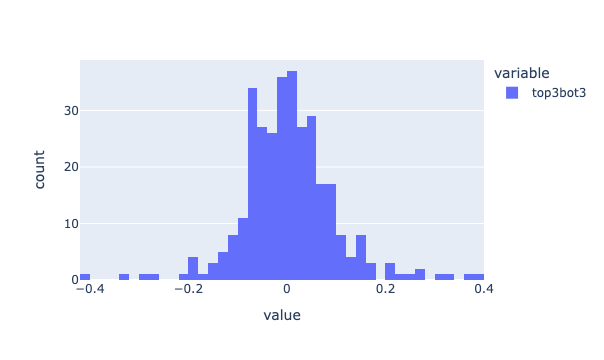

In [82]:
import plotly.express as px
import scipy.stats as sps
print(f'Skew ={sps.skew(grossr_top3)[0].round(6)}\nKurtosis ={sps.kurtosis(grossr_top3, fisher=True)[0].round(6)} >> 0 => Fat-tailed distribution')

px.histogram(data_frame = grossr_top3, nbins=70)

Skew pfo1 = 0.957645, Excess kurtosis pfo1 =8.043103
Skew pfo2 = 0.320260, Excess kurtosis pfo2 =2.648383
Skew pfo3 = 0.372212, Excess kurtosis pfo3 =6.16189
Skew pfo4 = -0.342621, Excess kurtosis pfo4 =4.054092
Skew pfo5 = 0.439178, Excess kurtosis pfo5 =1.312236


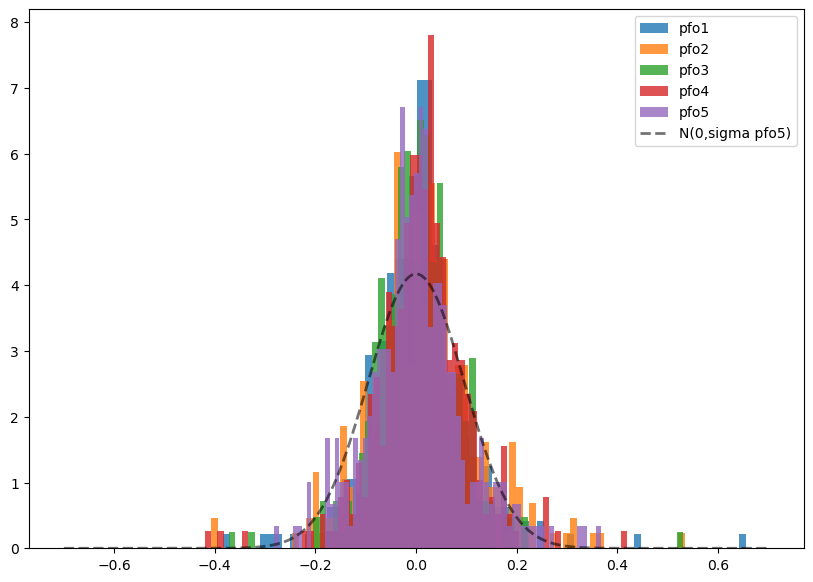

In [94]:
import matplotlib.pyplot as plt
import scipy.stats as sps
fig, ax = plt.subplots(figsize=(10,7))

i=0.8
for name in ("pfo1", "pfo2", "pfo3", "pfo4", "pfo5"):
    print(f'Skew {name} = {sps.skew(gross_rdf[name]):.6f}, Excess kurtosis {name} ={sps.kurtosis(gross_rdf[name], fisher=True).round(6)}')
    gross_rdf[name].hist(bins=70, grid=False, alpha = i, density = True,label=name)
    
x_grid = np.linspace(-0.7, 0.7, 500)
ax.plot(x_grid, sps.norm.pdf(x_grid, scale= gross_rdf["pfo5"].std()), color="black", lw=2, linestyle="--", label="N(0,sigma pfo5)", alpha = 0.55)
ax.legend();

Summarising all the results

In [86]:
final_df = pd.concat([grossr_top3, gross_rdf], axis=1)
final_df["cum.ret. top3bot3"] = grossr_top3.cumsum()
for i in gross_rdf.columns:
    final_df["cum.ret. " +i] = gross_rdf[i].cumsum()
final_df.head()

,top3bot3,pfo1,pfo2,pfo3,pfo4,pfo5,cum.ret. top3bot3,cum.ret. pfo1,cum.ret. pfo2,cum.ret. pfo3,cum.ret. pfo4,cum.ret. pfo5
1998-03-02,0.372770,0.010327,0.167490,-0.012659,0.131626,0.201633,0.372770,0.010327,0.167490,-0.012659,0.131626,0.201633
1998-04-01,-0.206045,-0.038689,0.006158,-0.125262,0.051776,-0.137091,0.166725,-0.028362,0.173648,-0.137921,0.183402,0.064542
1998-05-01,-0.004077,0.018763,-0.141935,-0.035337,-0.025416,-0.159813,0.162648,-0.009599,0.031713,-0.173258,0.157986,-0.095271
1998-06-01,-0.106963,-0.069150,-0.402185,-0.046610,-0.053125,-0.085082,0.055685,-0.078749,-0.370472,-0.219868,0.104860,-0.180353
1998-07-01,0.142729,0.004338,0.227570,-0.019283,0.154903,0.040797,0.198415,-0.074412,-0.142902,-0.239151,0.259763,-0.139556


We plot the evolution of the 5th portfolio whose returns are particularly eratic

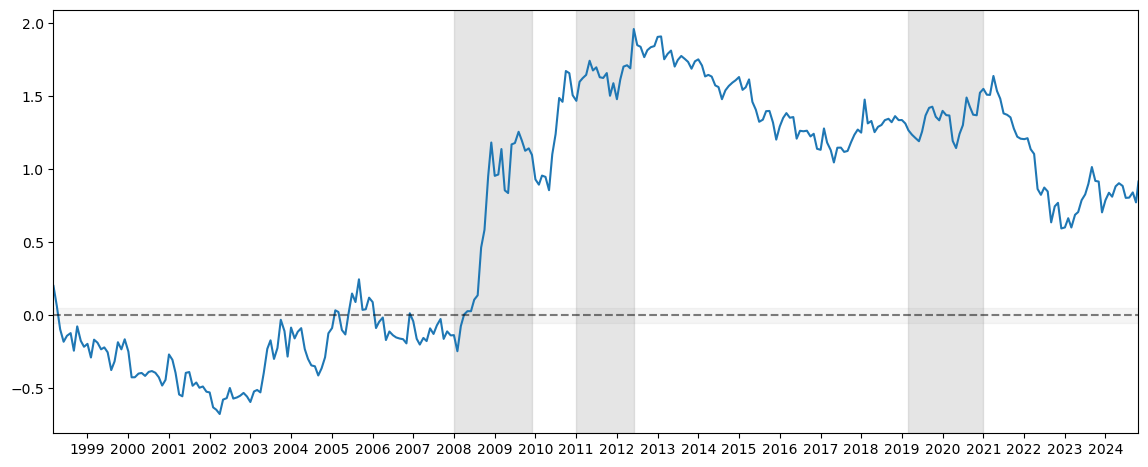

In [87]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(14, 5.5))

ax.plot(final_df.index, final_df["cum.ret. pfo5"], label=name)

ax.axhline(0, alpha=0.5, linestyle="--", color="black");
ax.fill_between(ax.get_xlim(), -0.05, 0.05, alpha =0.075, color='grey')
ax.axvspan(pd.Timestamp("2008-01-01"), pd.Timestamp("2009-12-01"), color='grey', alpha=0.2)
ax.axvspan(pd.Timestamp("2011-01-01"), pd.Timestamp("2012-06-01"), color='grey', alpha=0.2)
ax.axvspan(pd.Timestamp("2019-03-01"), pd.Timestamp("2021-01-01"), color='grey', alpha=0.2)

ax.set_xlim(final_df.index.min(), final_df.index.max())
ax.xaxis.set_major_locator(mdates.YearLocator(1))

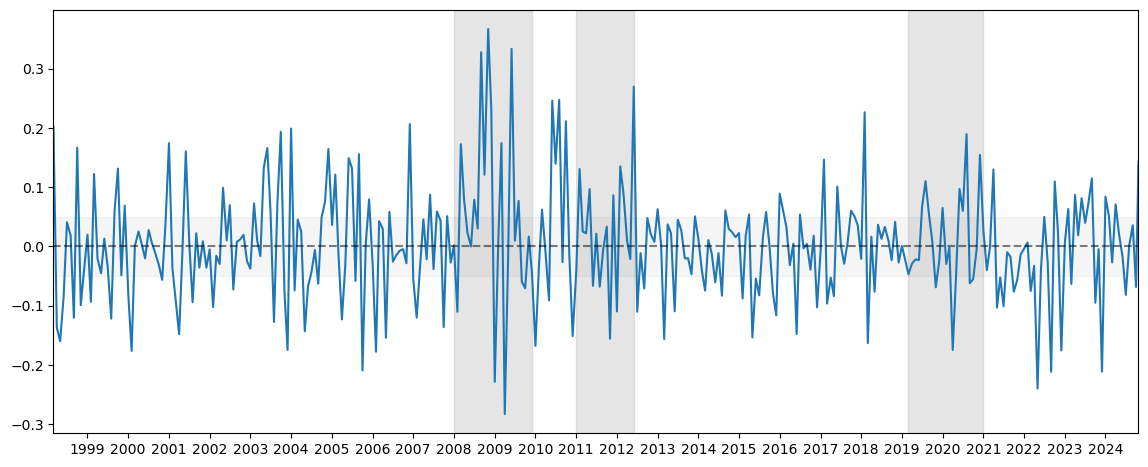

In [65]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(14, 5.5))

ax.plot(gross_rdf.index, gross_rdf["pfo5"], label=name)

ax.axhline(0, alpha=0.5, linestyle="--", color="black");
ax.fill_between(ax.get_xlim(), -0.05, 0.05, alpha =0.075, color='grey')
ax.axvspan(pd.Timestamp("2008-01-01"), pd.Timestamp("2009-12-01"), color='grey', alpha=0.2)
ax.axvspan(pd.Timestamp("2011-01-01"), pd.Timestamp("2012-06-01"), color='grey', alpha=0.2)
ax.axvspan(pd.Timestamp("2019-03-01"), pd.Timestamp("2021-01-01"), color='grey', alpha=0.2)

ax.set_xlim(gross_rdf.index.min(), gross_rdf.index.max())
ax.xaxis.set_major_locator(mdates.YearLocator(1))